

# CIFAR 

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

automobile


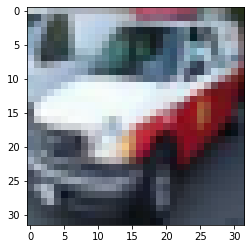

In [7]:
i = 60
plt.imshow(x_train[i])
label = y_train[i]
print(class_labels[label[0]])

# CNN

In [8]:
x_train_final = x_train / 255
x_test_final =  x_test / 255

In [9]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
x_train.shape[1:]

(32, 32, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                        

In [14]:

model.fit(x_train_final, y_train_cat,batch_size = 128,epochs = 30,verbose = 1,validation_data = (x_test_final, y_test_cat))

Epoch 1/30
391/391 [==============================] - 15s 12ms/step - loss: 1.5578 - accuracy: 0.4280 - val_loss: 1.3021 - val_accuracy: 0.5361
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 1.2019 - accuracy: 0.5685 - val_loss: 1.0948 - val_accuracy: 0.6152
Epoch 3/30
391/391 [==============================] - 4s 9ms/step - loss: 1.0088 - accuracy: 0.6437 - val_loss: 0.9783 - val_accuracy: 0.6561
Epoch 4/30
391/391 [==============================] - 4s 9ms/step - loss: 0.8965 - accuracy: 0.6850 - val_loss: 1.0072 - val_accuracy: 0.6495
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 0.8083 - accuracy: 0.7164 - val_loss: 0.9164 - val_accuracy: 0.6836
Epoch 6/30
391/391 [==============================] - 4s 9ms/step - loss: 0.7450 - accuracy: 0.7407 - val_loss: 0.9407 - val_accuracy: 0.6797
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 0.6835 - accuracy: 0.7602 - val_loss: 0.9408 - val_accuracy: 0.6786
E

# with drop out

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
print(model.count_params())
batch_size = 128
epochs = 30
model.fit(x_train_final, y_train_cat,batch_size = 128,epochs = 30,verbose = 1,validation_data = (x_test_final, y_test_cat))

367978
Epoch 1/30
391/391 [==============================] - 7s 14ms/step - loss: 1.6977 - accuracy: 0.3798 - val_loss: 1.4897 - val_accuracy: 0.4732
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 1.3174 - accuracy: 0.5278 - val_loss: 1.2462 - val_accuracy: 0.5591
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 1.1837 - accuracy: 0.5781 - val_loss: 1.1459 - val_accuracy: 0.5947
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 1.0939 - accuracy: 0.6137 - val_loss: 1.0844 - val_accuracy: 0.6200
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 1.0128 - accuracy: 0.6421 - val_loss: 1.0290 - val_accuracy: 0.6371
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.9527 - accuracy: 0.6640 - val_loss: 0.9683 - val_accuracy: 0.6644
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.9035 - accuracy: 0.6818 - val_loss: 0.9485 - val_accuracy:

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
#Feature Detector
model = Sequential()
#1st block
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3), padding = 'same', kernel_initializer= 'he_uniform'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' ,padding = 'same',kernel_initializer= 'he_uniform'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
#padding gosheh ha ahamiyat midahad va andazeh feature map bdon taaghir mimand
#2nd block
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same' ,kernel_initializer= 'he_uniform'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu' , padding = 'same',kernel_initializer= 'he_uniform'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
#3rd block
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer= 'he_uniform'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer= 'he_uniform'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

# Fully Connected
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax',kernel_initializer= 'he_uniform'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
print(model.count_params())
batch_size = 128
epochs = 30

print('Num Params : ', model.count_params())
model.fit(x_train_final, y_train_cat,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test_final, y_test_cat))

550570
Num Params :  550570
Epoch 1/30
391/391 [==============================] - 11s 18ms/step - loss: 1.7420 - accuracy: 0.3669 - val_loss: 1.5245 - val_accuracy: 0.4730
Epoch 2/30
391/391 [==============================] - 6s 16ms/step - loss: 1.1933 - accuracy: 0.5711 - val_loss: 1.1326 - val_accuracy: 0.6008
Epoch 3/30
391/391 [==============================] - 6s 15ms/step - loss: 0.9794 - accuracy: 0.6541 - val_loss: 0.8538 - val_accuracy: 0.7012
Epoch 4/30
391/391 [==============================] - 7s 17ms/step - loss: 0.8470 - accuracy: 0.7010 - val_loss: 0.7898 - val_accuracy: 0.7226
Epoch 5/30
391/391 [==============================] - 6s 16ms/step - loss: 0.7490 - accuracy: 0.7379 - val_loss: 0.7335 - val_accuracy: 0.7429
Epoch 6/30
391/391 [==============================] - 6s 17ms/step - loss: 0.6789 - accuracy: 0.7613 - val_loss: 0.6819 - val_accuracy: 0.7643
Epoch 7/30
391/391 [==============================] - 6s 15ms/step - loss: 0.6168 - accuracy: 0.7837 - val_loss: 